<a href="https://colab.research.google.com/github/amelliaaas/PraktikumML_282-305/blob/Kelas_mechine_learning/CNN_Modifikasi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Covid19-dataset

/content/drive/MyDrive/Covid19-dataset


In [3]:
!ls

model_2.pt  test  train


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# path to images
path = '/content/drive/MyDrive/Covid19-dataset/train/'

# animal categories
categories = ['Covid', 'Normal', 'Viral Pneumonia']

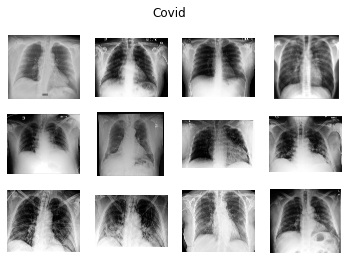

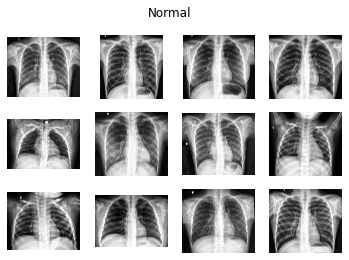

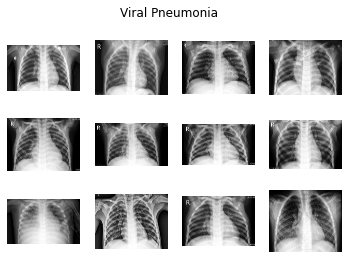

In [5]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [6]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

Covid  => height min :  391 width min :  439
Covid  => height max :  4095 width max :  4248
Normal  => height min :  1063 width min :  1534
Normal  => height max :  2713 width max :  2752
Viral Pneumonia  => height min :  744 width min :  1056
Viral Pneumonia  => height max :  1456 width max :  2000


In [7]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

[['/content/drive/MyDrive/Covid19-dataset/train/Normal/073.jpeg', 1], ['/content/drive/MyDrive/Covid19-dataset/train/Covid/COVID-00015b.png', 0], ['/content/drive/MyDrive/Covid19-dataset/train/Covid/COVID-00002.jpg', 0], ['/content/drive/MyDrive/Covid19-dataset/train/Covid/COVID-00019.jpg', 0], ['/content/drive/MyDrive/Covid19-dataset/train/Normal/02.jpeg', 1], ['/content/drive/MyDrive/Covid19-dataset/train/Normal/094.jpeg', 1], ['/content/drive/MyDrive/Covid19-dataset/train/Covid/COVID-00034.jpg', 0], ['/content/drive/MyDrive/Covid19-dataset/train/Covid/057.jpeg', 0], ['/content/drive/MyDrive/Covid19-dataset/train/Covid/COVID-00005.jpg', 0], ['/content/drive/MyDrive/Covid19-dataset/train/Viral Pneumonia/084.jpeg', 2]]


In [8]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

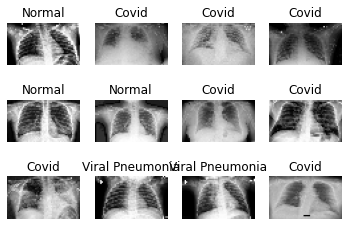

In [9]:
# Let's check everything is ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [10]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [11]:
# Preprocess class labels
trainY = np_utils.to_categorical(trainY, 3)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(200, 32, 55, 3)
(51, 32, 55, 3)
(200, 3)
(51,)


In [12]:
model = Sequential()

model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 54, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 26, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 13, 32)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 13, 32)         0         
                                                                 
 flatten (Flatten)           (None, 2912)              0

In [14]:
#aku nambahin validation data biar epoch nya ga training aja 

model.fit(trainX, trainY, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 41ms/step - loss: 0.1055 - accuracy: 0.9450
Epoch 2/100
7/7 [==============================] - 0s 42ms/step - loss: 0.0968 - accuracy: 0.9700
Epoch 3/100
7/7 [==============================] - 0s 42ms/step - loss: 0.0866 - accuracy: 0.9650
Epoch 4/100
7/7 [==============================] - 0s 44ms/step - loss: 0.0651 - accuracy: 0.9800
Epoch 5/100
7/7 [==============================] - 0s 42ms/step - loss: 0.0612 - accuracy: 0.9750
Epoch 6/100
7/7 [==============================] - 0s 42ms/step - loss: 0.0428 - accuracy: 0.9900
Epoch 7/100
7/7 [==============================] - 0s 43ms/step - loss: 0.0707 - accuracy: 0.9750
Epoch 8/100
7/7 [==============================] - 0s 43ms/step - loss: 0.0651 - accuracy: 0.9650
Epoch 9/100
7/7 [==============================] - 0s 43ms/step - loss: 0.0689 - accuracy: 0.9800
Epoch 10/100
7/7 [==============================] - 0s 44ms/step - loss: 0.0656 - accuracy: 0.9800
Epoch 11/100
7/7 [=

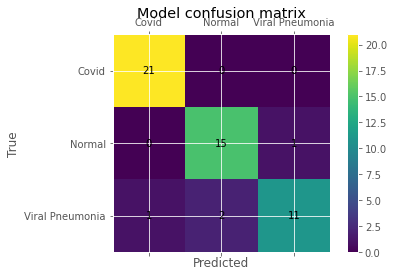

Accuracy : 92.16%


In [19]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [21]:
plt.savefig("acc_1.svg")

<Figure size 432x288 with 0 Axes>